In [1]:
import pandas as pd
from scipy.io import loadmat
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

df_spike = pd.DataFrame(loadmat("data/classification/spike_count_500.mat")['spike_count'])
df_target = pd.DataFrame(loadmat("data/classification/target.mat")['target']).T - 1
df_target.columns = ["y"]

df = pd.concat([df_spike, df_target], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,y
0,11.0,3.0,14.0,25.0,4.0,1.0,25.0,0.0,14.0,1.0,...,5.0,9.0,13.0,0.0,3.0,6.0,22.0,0.0,18.0,0.0
1,11.0,2.0,13.0,32.0,4.0,1.0,19.0,0.0,15.0,0.0,...,6.0,7.0,14.0,2.0,4.0,8.0,25.0,2.0,19.0,0.0
2,10.0,4.0,8.0,32.0,5.0,1.0,21.0,0.0,19.0,0.0,...,5.0,7.0,14.0,0.0,7.0,2.0,32.0,0.0,16.0,0.0
3,16.0,3.0,13.0,30.0,4.0,0.0,29.0,0.0,19.0,0.0,...,5.0,8.0,14.0,1.0,4.0,4.0,29.0,3.0,10.0,0.0
4,14.0,4.0,17.0,35.0,3.0,2.0,20.0,0.0,10.0,0.0,...,1.0,10.0,14.0,0.0,6.0,6.0,28.0,2.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,6.0,0.0,3.0,32.0,7.0,3.0,18.0,1.0,9.0,3.0,...,6.0,10.0,16.0,1.0,15.0,5.0,25.0,0.0,21.0,7.0
796,4.0,5.0,8.0,21.0,9.0,7.0,21.0,2.0,12.0,0.0,...,6.0,17.0,17.0,0.0,6.0,3.0,20.0,3.0,18.0,7.0
797,6.0,1.0,6.0,28.0,6.0,4.0,26.0,0.0,11.0,0.0,...,7.0,13.0,13.0,1.0,6.0,3.0,27.0,1.0,16.0,7.0
798,4.0,2.0,6.0,27.0,7.0,4.0,22.0,0.0,9.0,1.0,...,8.0,14.0,17.0,1.0,13.0,7.0,33.0,0.0,22.0,7.0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(df_spike, df_target, test_size=0.2, random_state=42, shuffle=True, stratify=df_target.y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

print(f"X_train: {X_train.shape} X_valid: {X_valid.shape} X_test: {X_test.shape}")
print(f"y_test: {Counter(y_test.y.values)}")

X_train: (576, 98) X_valid: (64, 98) X_test: (160, 98)
y_test: Counter({5.0: 20, 2.0: 20, 6.0: 20, 3.0: 20, 0.0: 20, 1.0: 20, 4.0: 20, 7.0: 20})


In [3]:
def print_metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)

    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt="d")
    plt.show()
    
    print(f"Accuracy: {accuracy}")

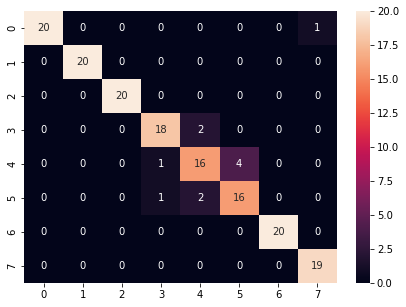

Accuracy: 0.93125


In [4]:
lm = LogisticRegression().fit(X_train, y_train)
pred = lm.predict(X_test)

print_metrics(y_test, pred)

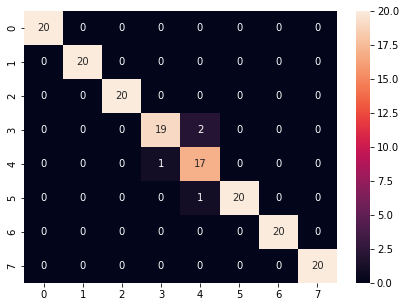

Accuracy: 0.975


In [5]:
svc = SVC().fit(X_train, y_train)
pred = svc.predict(X_test)

print_metrics(y_test, pred)

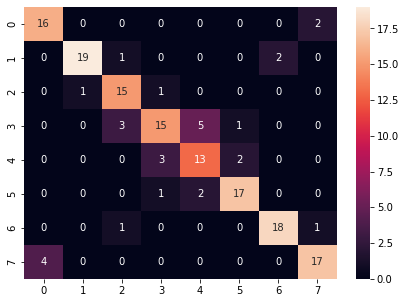

Accuracy: 0.8125


In [6]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
pred = tree.predict(X_test)

print_metrics(y_test, pred)

2021-12-18 21:50:07.806936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-18 21:50:07.807118: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


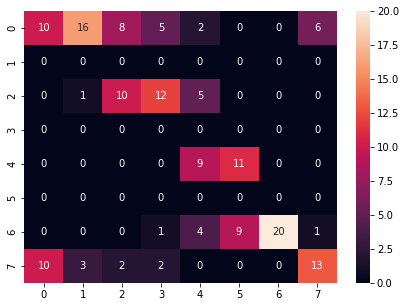

Accuracy: 0.3875


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[98]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8)
])

optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)
pred = tf.argmax(model.predict(X_test), axis=1).numpy()

print_metrics(y_test, pred)